In [26]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from bezier import Bezier
from dynamics import Dynamics
from map import mapGenerator
from planner import Planner
Deg2Rad = pi/180    #Factor for converting degee to radian

In [27]:
'''''''Initial states of the vehicle'''''''
start = [0, 25] #Starting coordinate in meter
start_heading = 0  #Starting heading in degrees
start_steering = 0  #Starting steering in degrees
goal = [40, 40] #Goal coordinate in meter
goal_heading = 60  #Goal heading in degrees
goal_steering = 0  #Goal steering in degrees
car_length = 5
car_width = 3 
wheelbase = 2
tolerance = 3
obstacle_type = "Some_obstacle"
'''Convert all angles into radians'''
start_heading *= Deg2Rad
start_steering *= Deg2Rad
goal_heading *= Deg2Rad
goal_steering *= Deg2Rad

In [28]:
'''Map & Obstacles generation'''''
mapsize = 50   #Map size (square map)
freeGrid_num, obstacle, danger_zone = mapGenerator(start, obstacle_type, mapsize = 50)

'''Vehicle constraints & dynamics'''''
init_distance = \
    sqrt((start[0] - goal[0])**2 + (start[1] - goal[1])**2) #Initial distance when the goal is assigned

'''Vehicle constraints & dynamics'''''
theta, theta_future, displacement_rear, displacement_rear_future, steering_step = \
    Dynamics(wheelbase, search_length = 2.5, speed = 5, dt = 1)

In [29]:
'''Bezier spline calculation'''''
bz = Bezier(start, goal, start_heading, goal_heading, start_steering, mapsize,
            car_length, car_width, wheelbase, 3*mapsize,"Nofound")
bezier_spline = bz.calculation()
# bz.plot()

In [30]:
p = Planner(start, goal, start_heading, goal_heading, start_steering, mapsize,
            freeGrid_num, tolerance, car_length, car_width, wheelbase, obstacle_type)
path, path_tree = p.calculation()

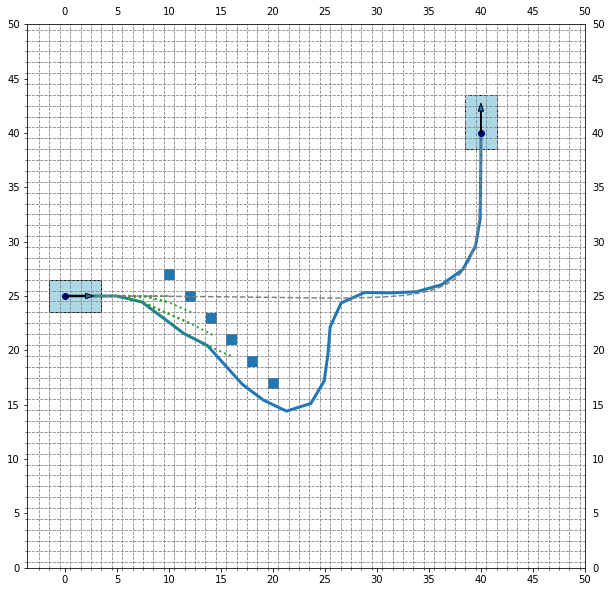

In [31]:
x, y = np.vstack(path).T
plt.figure(figsize=(10,10))
plt.scatter(obstacle[:,0],obstacle[:,1],marker='s',s=100)
plt.plot(x,y,linewidth = '3')
for i in range(len(path_tree)):
    path_tree[i] = np.vstack(path_tree[i])
    x, y = path_tree[i].T
    plt.plot(x,y,color = 'C2', linewidth = 2, linestyle = ':')
plt.plot(bezier_spline[:,0], bezier_spline[:,1], linestyle='--',color = 'grey')


plt.gca().add_patch(plt.Rectangle((start[0] - 0.5 * (car_length - wheelbase) , start[1] + 0.5* car_width ), 3, 5, fc = 'lightblue',
                                  angle = -90,edgecolor = 'black'))
plt.gca().add_patch(plt.Rectangle((goal[0] - 0.5 * (car_width*np.sin(goal_heading) + (car_length - wheelbase)*np.cos(goal_heading)),
                                   goal[1] - 0.5 * (-car_width*np.cos(goal_heading) + (car_length - wheelbase)*np.sin(goal_heading))),
                                  3, 5, fc = 'lightblue',edgecolor = 'black', angle = -90 + goal_heading*180/pi ,linestyle='--'))
plt.scatter(start[0], start[1], zorder = 10, color = 'navy')
plt.scatter(goal[0], goal[1], zorder = 10, color = 'navy')
plt.arrow(start[0],start[1], wheelbase*np.cos(start_heading), wheelbase*np.sin(start_heading), head_width=0.5,zorder = 11)
plt.arrow(goal[0],goal[1], wheelbase*np.cos(goal_heading), wheelbase*np.sin(goal_heading), head_width=0.5,zorder = 11)
plt.xticks(np.arange(0, mapsize+1, 5.0))
plt.yticks(np.arange(0, mapsize+1, 5.0)) 
plt.axes().set_yticks(np.arange(0.5, mapsize+0.5, 1.0), minor=True)
plt.axes().set_xticks(np.arange(-2.5, mapsize+0.5, 1.0), minor=True)
plt.grid(b=True, which='minor', color='grey', linestyle='--')
plt.gca().xaxis.set_tick_params(labeltop='on')
plt.gca().yaxis.set_tick_params(labelright='on')